# Using Monte Carlo Simulations to Find Next Best Moves
We will be using a simple game for this: Tic Tac Toe. We are using a simpler game with less moves because Monte Carlo simulations rely heavily on law of large numbers to give good predictions. If we have too many possible moves or possible outcomes, the optimal move becomes heavy to compute.

First, lets establish a random valid move for both player 1 and 2. Player 1 represents 1 and Player 2 represents -1.

In [ ]:
import random
import copy
import matplotlib as plt

def player1_move(grid):
    while True:
        rand_row = random.randint(0, 2)
        rand_col = random.randint(0, 2)
        if grid[rand_row][rand_col] == 0:
            grid[rand_row][rand_col] = 1
            break
    return grid

def player2_move(grid):
    while True:
        rand_row = random.randint(0, 2)
        rand_col = random.randint(0, 2)
        if grid[rand_row][rand_col] == 0:
            grid[rand_row][rand_col] = -1
            break
    return grid

Next we will need to check for a tie or a win after each move.

In [31]:
def check_winner(grid):
    for i in range(3):
        if grid[i][0] == grid [i][1] == grid[i][2] != 0:
            return grid[i][0]
        if grid[0][i] == grid[1][i] == grid[2][i] != 0:
            return grid[0][i]
    if grid[0][0] == grid[1][1] == grid[2][2] != 0:
        return grid[0][0]
    if grid[0][2] == grid[1][1] == grid[2][0] != 0:
        return grid[0][2]
    return 0

def is_draw(grid):
    for row in grid:
        if 0 in row:
            return False
    return True

Next, lets check for all possible squares we can play on. Then we will simulate completely random moves between Player 1 and 2, all the way up to one of them wins or draws. We will then keep a score of how many times the player that goes next wins, and the highest score will obviously be the next best move. We will run each simulation 500 times for each valid move for the next player.

In [72]:
def next_best_move(grid, playerturn):
    bestscore = -float('inf')
    bestmove = None
    moves = [[0, 0, 0] for _ in range(3)]

    for i in range(3):
        for j in range(3):
            if grid[i][j] == 0:
                score = 0
                for _ in range(500):
                    sim_grid = copy.deepcopy(grid)
                    sim_grid[i][j] = playerturn
                    winner = simulate_game(sim_grid, -playerturn)
                    if winner == playerturn:
                        score += 1
                    elif winner == -playerturn:
                        score -= 1
                moves[i][j] = score / 500
                if score > bestscore:
                    bestscore = score
                    bestmove = (i, j)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.axis('off')
    table = ax.table(cellText=moves, loc='center', cellLoc='center', edges='closed')
    table.scale(1, 1)
    plt.show()
    return bestmove


def simulate_game(start_grid, start_player):
    grid = copy.deepcopy(start_grid)
    player = start_player

    while True:
        winner = check_winner(grid)
        if winner != 0:
            return winner
        if is_draw(grid):
            return 0
        if player == 1:
            player1_move(grid)
        else:
            player2_move(grid)
        player *= -1

Next, all we have to do is input a grid and the next players turn. Be sure to alternate between 1 and -1 for variable turn. I also visualized the 3x3 grid to see what possible moves there are and their percentage of winning.

Quick note: % of winning being below 50% does not mean you are disadvantaged. Remember, most tic tac toe games end in a tie. There are also some differences in symmetric moves, like opposite corners. By increasing the number of simulations we can see them converging to the same value. Right now, it is only 500 to save computation time.


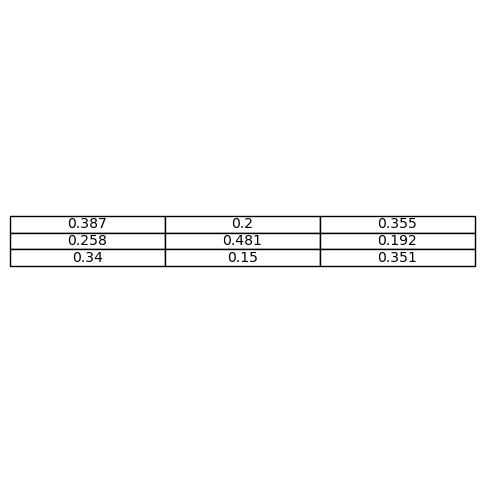

(1, 1)

In [71]:

grid = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
turn = 1

next_best_move(grid, turn)

Looks like the famous saying "going the middle is the best" is actually mathematically true.

Feel free to change the grid to match a current ongoing game between you and whoever else you are playing against.

Note, this method can be applied to almost every game, the only issue with it being its high computation once the number of moves increases.